#### `logistic Regression (Scikit learn)`

In [37]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,matthews_corrcoef

In [38]:
files_paths = {
  "with_fs" : ('../../../data/processed/train_filtered.csv','../../../data/processed/test_filtered.csv'),
  "without_fs" : ('../../../data/processed/train_data.csv','../../../data/processed/test_data.csv')
}

metrics_with_fs = None
metrics_without_fs = None
repo = None


`Calculate The report classification of the two cases (with features selection and without features selection)`

In [39]:
for files_type in files_paths:
  # Getting files
  training_file = files_paths[files_type][0] 
  testing_file = files_paths[files_type][1] 
  training_data = pd.read_csv(training_file)
  testing_data = pd.read_csv(testing_file)
  # 
  X_train = training_data.drop(columns=["target"])
  y_train = training_data["target"]
  # 
  X_test = testing_data.drop(columns=["target"])
  y_test = testing_data["target"]
  # 
  # 
  lgr_model = LogisticRegression(max_iter=1000,random_state=42)
  # Training
  starting_time = time.time()
  lgr_model.fit(X_train,y_train)
  training_time = time.time() - starting_time
  # Testing
  starting_time = time.time()
  y_pred = lgr_model.predict(X_test)
  testing_time = time.time() - starting_time
  # 
  repo = classification_report(y_test,y_pred,output_dict=True)
  mcc = matthews_corrcoef(y_test, y_pred)
  # 
  repo_res = { 
    'accuracy'  : repo['accuracy'],
    'precision' : repo['weighted avg']['precision'],
    'recall'    : repo['weighted avg']['recall'],
    'f1_score'  : repo['weighted avg']['f1-score'],
    'mcc' : mcc,
    'training_time' : training_time,
    'testing_time' : testing_time
  } 
  if files_type == 'with_fs' : metrics_with_fs = repo_res
  elif files_type == 'without_fs' : metrics_without_fs =  repo_res

In [40]:
metrics_with_fs

{'accuracy': 0.8333333333333334,
 'precision': 0.8405532755737954,
 'recall': 0.8333333333333334,
 'f1_score': 0.8331341694025501,
 'mcc': 0.6741660613834428,
 'training_time': 0.01801133155822754,
 'testing_time': 0.002892017364501953}

In [41]:
metrics_without_fs

{'accuracy': 0.8865248226950354,
 'precision': 0.8988615993211877,
 'recall': 0.8865248226950354,
 'f1_score': 0.8861819283236465,
 'mcc': 0.7857288452603981,
 'training_time': 0.04335904121398926,
 'testing_time': 0.01484370231628418}

##### `Plotting the two classification report on both cases (with and without feature selection)`

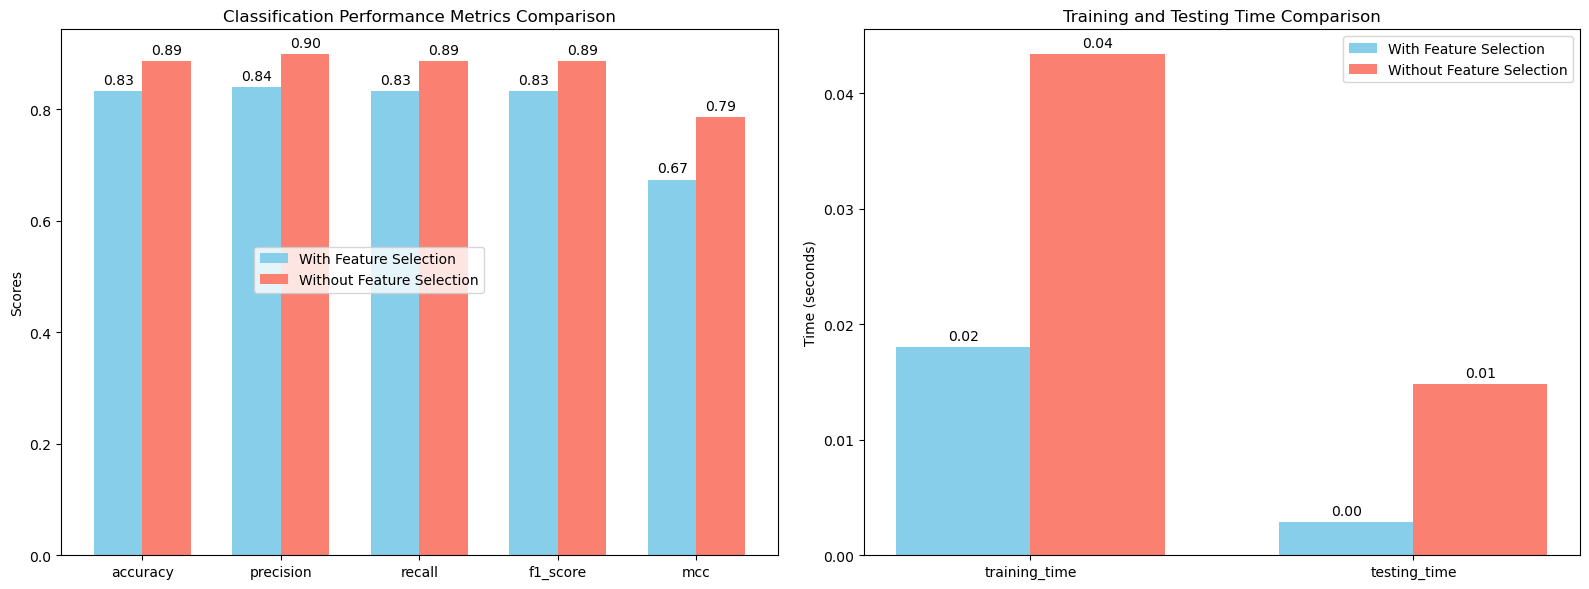

In [46]:
# Define metrics to plot
performance_metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'mcc']
time_metrics = ['training_time', 'testing_time']

# Extract values
with_fs_performance = [metrics_with_fs[m] for m in performance_metrics]
without_fs_performance = [metrics_without_fs[m] for m in performance_metrics]

with_fs_time = [metrics_with_fs[m] for m in time_metrics]
without_fs_time = [metrics_without_fs[m] for m in time_metrics]

# Set up the bar chart parameters
x_perf = np.arange(len(performance_metrics))  # the label locations
x_time = np.arange(len(time_metrics))
width = 0.35  # the width of the bars

# Create a single figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # Adjust figsize as needed

# ============================
# Plot Performance Metrics
# ============================
rects1 = ax1.bar(x_perf - width/2, with_fs_performance, width, label='With Feature Selection', color='skyblue')
rects2 = ax1.bar(x_perf + width/2, without_fs_performance, width, label='Without Feature Selection', color='salmon')

# Add labels, title, and custom x-axis tick labels
ax1.set_ylabel('Scores')
ax1.set_title('Classification Performance Metrics Comparison')
ax1.set_xticks(x_perf)
ax1.set_xticklabels(performance_metrics)
ax1.legend(bbox_to_anchor=(0.6, 0.6))

# Function to attach a text label above each bar in rects
def autolabel(ax, rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(ax1, rects1)
autolabel(ax1, rects2)

# ============================
# Plot Time Metrics
# ============================
rects3 = ax2.bar(x_time - width/2, with_fs_time, width, label='With Feature Selection', color='skyblue')
rects4 = ax2.bar(x_time + width/2, without_fs_time, width, label='Without Feature Selection', color='salmon')

# Add labels, title, and custom x-axis tick labels
ax2.set_ylabel('Time (seconds)')
ax2.set_title('Training and Testing Time Comparison')
ax2.set_xticks(x_time)
ax2.set_xticklabels(time_metrics)
ax2.legend()

autolabel(ax2, rects3)
autolabel(ax2, rects4)

# Adjust layout for better spacing
fig.tight_layout()

# Display the plot
plt.show()

